In [1]:
import numpy as np
import pandas as pd
import opendatasets as od
import seaborn as sns
import time
import re

from matplotlib import pyplot as plt

from ai_essay_prediction_misha.pipeline import manager, entities_data as e

In [2]:
IN_PYCHARM_NOW = True

In [3]:
if IN_PYCHARM_NOW:
    dataset_name = 'out-after-filter-essayaiprediction'
    name_csv_file = 'df_after_filtering.csv'

    dataset_url = f'https://www.kaggle.com/datasets/goopy7/{dataset_name}/{name_csv_file}'
    #'https://www.kaggle.com/datasets/goopy7/out-after-filter-essayaiprediction/df_after_filtering.csv'
    od.download(dataset_url, data_dir= '.')

    #df_pop = pd.read_csv('./out-after-filter-essayaiprediction/df_after_filtering.csv')
    df_pop = pd.read_csv(f'./{dataset_name}/{name_csv_file}')



else:
    df_pop = pd.read_csv('/kaggle/input/data-filter/df_after_filtering.csv')

print(df_pop.source.value_counts())
df_pop

Skipping, found downloaded files in ".\out-after-filter-essayaiprediction" (use force=True to force download)
source
human_essays_by_misha                  7270
persaude_corpus                        4000
train_essays                           1378
jelts                                  1274
intel_neural_chat_7b                   1000
daigt_external                         1000
llama_70b_v1                           1000
claude                                 1000
llama2_chat                            1000
mistral7binstruct_v1                   1000
palm                                   1000
argugpt                                1000
chat_gpt_moth                          1000
falcon_180b_v1                         1000
mistral7binstruct_v2                   1000
mistral7B_CME                          1000
darragh_claude_v6                      1000
gpt_3_5_turbo                           500
mistralai/Mistral-7B-Instruct-v0.1      400
NousResearch/Llama-2-7b-chat-hf         400
coh

,text,generated,source
0,\n\nTitle: A Revolutionary Transformation in M...,1.0,intel_neural_chat_7b
1,"\n\nFor some people, being labeled as extraord...",1.0,intel_neural_chat_7b
2,"\n\nTo begin, it's important to understand how...",1.0,intel_neural_chat_7b
3,\n\nIntroduction: Surfing has been largely ass...,1.0,intel_neural_chat_7b
4,\n\n\n\nIntroduction: The Concept of Driverles...,1.0,intel_neural_chat_7b
...,...,...,...
29120,Title: The Benefits of Limiting Car Usage: A M...,1.0,gpt_4_turbo
29121,The Electoral College is a unique system of el...,1.0,generated_by_misha_with_gpt_3_and_4
29122,Limiting car usage can have several advantages...,1.0,generated_by_misha_with_gpt_3_and_4
29123,"Dear Senator,\nI am writing to express my view...",1.0,generated_by_misha_with_gpt_3_and_4


In [4]:
df_sam = df_pop.sample(5000).reset_index(drop=True)

In [5]:
pipeline = manager.create_main_pipeline(False)
pipeline

sss


Pipeline(steps=[('lower_text',
                 LowerText(column_out='corrected_text', text_column='text')),
                ('count_amount_letters',
                 CountAmountLettersInText(column_out='n_letters',
                                          text_column='corrected_text')),
                ('count_amount_every_letter',
                 CountAmountEveryLetterInText(columns_out=set(),
                                              text_column='corrected_text')),
                ('separating_text_into_sentences',
                 SeparatingTextInt...
                 UserRegExp(column_text='corrected_text', columns_out=set(),
                            reg_exp=re.compile('[\'\\"]\\w\\s'), suffix='_6')),
                ('divide_matrix_into_vector',
                 DivideMatrixIntoVector(column_divides='n_letters',
                                        columns_divided=[set(), set(), set(),
                                                         set(), set(), set(),
                                                         set()],
                                        columns_out=[set(), set(), set(), set(),
                                                     set(), set(), set()])),
                ('drop',
                 DropperColumns(columns_to_drop={'n_letters', 'n_sentences',
                                                 'sentences_corrected_text'}))])

In [6]:
X = df_sam.drop(columns='generated')
y = df_sam['generated']

X = pipeline.fit_transform(X)
X

LowerText(column_out='corrected_text', text_column='text')

0.07996630668640137 - spent time


,text,source,corrected_text
0,"The face on Mars is just a natural landform, ...",cohere-command,"the face on mars is just a natural landform, ..."
1,"As a fellow citizen, I believe it is essenti...",NousResearch/Llama-2-7b-chat-hf,"as a fellow citizen, i believe it is essenti..."
2,Introduction: The Face on Mars has been a topi...,falcon_180b_v1,introduction: the face on mars has been a topi...


CountAmountLettersInText(column_out='n_letters', text_column='corrected_text')

0.004014253616333008 - spent time


,text,source,corrected_text,n_letters
0,"The face on Mars is just a natural landform, ...",cohere-command,"the face on mars is just a natural landform, ...",1857
1,"As a fellow citizen, I believe it is essenti...",NousResearch/Llama-2-7b-chat-hf,"as a fellow citizen, i believe it is essenti...",1933
2,Introduction: The Face on Mars has been a topi...,falcon_180b_v1,introduction: the face on mars has been a topi...,1622


CountAmountEveryLetterInText(columns_out={'\n', '\r', ' ', '!', '"', '#', '$',
                                          '%', '&', "'", '(', ')', '*', '+',
                                          ',', '-', '.', '/', '0', '1', '2',
                                          '3', '4', '5', '6', '7', '8', '9',
                                          ':', ';', ...},
                             text_column='corrected_text')

1.7496354579925537 - spent time


,text,source,corrected_text,n_letters,з,🌴,🧐,🏡,©,„,...,s,’,à,\r,影,°,r,>,́,😁
0,"The face on Mars is just a natural landform, ...",cohere-command,"the face on mars is just a natural landform, ...",1857,0,0,0,0,0,0,...,107,0,0,0,0,0,85,0,0,0
1,"As a fellow citizen, I believe it is essenti...",NousResearch/Llama-2-7b-chat-hf,"as a fellow citizen, i believe it is essenti...",1933,0,0,0,0,0,0,...,115,0,0,0,0,0,100,0,0,0
2,Introduction: The Face on Mars has been a topi...,falcon_180b_v1,introduction: the face on mars has been a topi...,1622,0,0,0,0,0,0,...,105,0,0,0,0,0,83,0,0,0


SeparatingTextIntoSentences(column_out='sentences_corrected_text',
                            text_column='corrected_text')

2.4951789379119873 - spent time


,text,source,corrected_text,n_letters,з,🌴,🧐,🏡,©,„,...,’,à,\r,影,°,r,>,́,😁,sentences_corrected_text
0,"The face on Mars is just a natural landform, ...",cohere-command,"the face on mars is just a natural landform, ...",1857,0,0,0,0,0,0,...,0,0,0,0,0,85,0,0,0,"[ the face on mars is just a natural landform,..."
1,"As a fellow citizen, I believe it is essenti...",NousResearch/Llama-2-7b-chat-hf,"as a fellow citizen, i believe it is essenti...",1933,0,0,0,0,0,0,...,0,0,0,0,0,100,0,0,0,"[ as a fellow citizen, i believe it is essent..."
2,Introduction: The Face on Mars has been a topi...,falcon_180b_v1,introduction: the face on mars has been a topi...,1622,0,0,0,0,0,0,...,0,0,0,0,0,83,0,0,0,[introduction: the face on mars has been a top...


CreateAmountSentences(column_out='n_sentences',
                      column_with_sentences='sentences_corrected_text')

0.0020122528076171875 - spent time


,text,source,corrected_text,n_letters,з,🌴,🧐,🏡,©,„,...,à,\r,影,°,r,>,́,😁,sentences_corrected_text,n_sentences
0,"The face on Mars is just a natural landform, ...",cohere-command,"the face on mars is just a natural landform, ...",1857,0,0,0,0,0,0,...,0,0,0,0,85,0,0,0,"[ the face on mars is just a natural landform,...",15.0
1,"As a fellow citizen, I believe it is essenti...",NousResearch/Llama-2-7b-chat-hf,"as a fellow citizen, i believe it is essenti...",1933,0,0,0,0,0,0,...,0,0,0,0,100,0,0,0,"[ as a fellow citizen, i believe it is essent...",13.0
2,Introduction: The Face on Mars has been a topi...,falcon_180b_v1,introduction: the face on mars has been a topi...,1622,0,0,0,0,0,0,...,0,0,0,0,83,0,0,0,[introduction: the face on mars has been a top...,14.0


UserRegExp(column_text='corrected_text', columns_out=set(),
           reg_exp=re.compile('[a-z]+([a-z]{2})\\W'), suffix='_0')

2.6255362033843994 - spent time


,text,source,corrected_text,n_letters,з,🌴,🧐,🏡,©,„,...,fd_0,cf_0,rw_0,tg_0,nr_0,fw_0,bl_0,yh_0,pb_0,lv_0
0,"The face on Mars is just a natural landform, ...",cohere-command,"the face on mars is just a natural landform, ...",1857,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,"As a fellow citizen, I believe it is essenti...",NousResearch/Llama-2-7b-chat-hf,"as a fellow citizen, i believe it is essenti...",1933,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,Introduction: The Face on Mars has been a topi...,falcon_180b_v1,introduction: the face on mars has been a topi...,1622,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


UserRegExp(column_text='corrected_text', columns_out=set(),
           reg_exp=re.compile('[a-z]+([a-z]{3})\\W'), suffix='_1')

4.275277853012085 - spent time


,text,source,corrected_text,n_letters,з,🌴,🧐,🏡,©,„,...,gho_1,aju_1,ayu_1,bah_1,wak_1,anu_1,kok_1,cuk_1,oze_1,vry_1
0,"The face on Mars is just a natural landform, ...",cohere-command,"the face on mars is just a natural landform, ...",1857,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,"As a fellow citizen, I believe it is essenti...",NousResearch/Llama-2-7b-chat-hf,"as a fellow citizen, i believe it is essenti...",1933,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,Introduction: The Face on Mars has been a topi...,falcon_180b_v1,introduction: the face on mars has been a topi...,1622,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


UserRegExp(column_text='corrected_text', columns_out=set(),
           reg_exp=re.compile('([a-z]\\W[a-z])'), suffix='_2')

5.32368803024292 - spent time


,text,source,corrected_text,n_letters,з,🌴,🧐,🏡,©,„,...,o.t_2,s?i_2,m?o_2,t g_2,s）o_2,l‐s_2,d/i_2,"m,s_2",c-i_2,k y_2
0,"The face on Mars is just a natural landform, ...",cohere-command,"the face on mars is just a natural landform, ...",1857,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,"As a fellow citizen, I believe it is essenti...",NousResearch/Llama-2-7b-chat-hf,"as a fellow citizen, i believe it is essenti...",1933,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,Introduction: The Face on Mars has been a topi...,falcon_180b_v1,introduction: the face on mars has been a topi...,1622,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


UserRegExp(column_text='corrected_text', columns_out=set(),
           reg_exp=re.compile('\\W(\\w)\\W'), suffix='_3')

0.6502470970153809 - spent time


,text,source,corrected_text,n_letters,з,🌴,🧐,🏡,©,„,...,q_3,β_3,ø_3,π_3,ı_3,½_3,¾_3,î_3,à_3,²_3
0,"The face on Mars is just a natural landform, ...",cohere-command,"the face on mars is just a natural landform, ...",1857,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,"As a fellow citizen, I believe it is essenti...",NousResearch/Llama-2-7b-chat-hf,"as a fellow citizen, i believe it is essenti...",1933,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,Introduction: The Face on Mars has been a topi...,falcon_180b_v1,introduction: the face on mars has been a topi...,1622,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


UserRegExp(column_text='corrected_text', columns_out=set(),
           reg_exp=re.compile('\\W(\\w{2})\\W'), suffix='_4')

1.0528419017791748 - spent time


,text,source,corrected_text,n_letters,з,🌴,🧐,🏡,©,„,...,uv_4,2a_4,tx_4,xv_4,nh_4,nk_4,m3_4,hn_4,lf_4,³o_4
0,"The face on Mars is just a natural landform, ...",cohere-command,"the face on mars is just a natural landform, ...",1857,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,"As a fellow citizen, I believe it is essenti...",NousResearch/Llama-2-7b-chat-hf,"as a fellow citizen, i believe it is essenti...",1933,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,Introduction: The Face on Mars has been a topi...,falcon_180b_v1,introduction: the face on mars has been a topi...,1622,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


UserRegExp(column_text='corrected_text', columns_out=set(),
           reg_exp=re.compile('[\'\\"]\\w\\s'), suffix='_6')

0.41709184646606445 - spent time


,text,source,corrected_text,n_letters,з,🌴,🧐,🏡,©,„,...,'r _6,'a _6,'t _6,'o _6,'b _6,"""s _6","""o _6",'s _6,'e _6,'s\n_6
0,"The face on Mars is just a natural landform, ...",cohere-command,"the face on mars is just a natural landform, ...",1857,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,"As a fellow citizen, I believe it is essenti...",NousResearch/Llama-2-7b-chat-hf,"as a fellow citizen, i believe it is essenti...",1933,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,Introduction: The Face on Mars has been a topi...,falcon_180b_v1,introduction: the face on mars has been a topi...,1622,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


DivideMatrixIntoVector(column_divides='n_letters',
                       columns_divided=[{'\n', '\r', ' ', '!', '"', '#', '$',
                                         '%', '&', "'", '(', ')', '*', '+', ',',
                                         '-', '.', '/', '0', '1', '2', '3', '4',
                                         '5', '6', '7', '8', '9', ':', ';', ...},
                                        {'aa_0', 'ab_0', 'ac_0', 'ad_0', 'ae_0',
                                         'af_0', 'ag_0', 'ah_0', 'ai_0', 'aj_0',
                                         'ak_0', 'al_0', 'am_0', 'an_0', 'ao_0',
                                         'ap_0', 'aq_0', 'ar_0', 'as_0', 'at_0',
                                         'au_0', 'av_0', '...
                                    {'00_4', '01_4', '02_4', '03_4', '04_4',
                                     '05_4', '06_4', '07_4', '08_4', '09_4',
                                     '10_4', '11_4', '12_4', '13_4', '14_4',
                                     '15_4', '16_4', '17_4', '18_4', '19_4',
                                     '1a_4', '1b_4', '20_4', '21_4', '22_4',
                                     '23_4', '24_4', '25_4', '26_4', '27_4', ...},
                                    {'"1 _6', '"6 _6', '"a _6', '"i _6',
                                     '"o _6', '"s _6', "'a _6", "'b _6",
                                     "'d _6", "'e _6", "'i _6", "'m _6",
                                     "'o _6", "'r\xa0_6", "'s\n_6", "'s _6",
                                     "'s\xa0_6", "'t _6", "'t\xa0_6"}])

2.330659866333008 - spent time


,text,source,corrected_text,n_letters,з,🌴,🧐,🏡,©,„,...,'r _6,'a _6,'t _6,'o _6,'b _6,"""s _6","""o _6",'s _6,'e _6,'s\n_6
0,"The face on Mars is just a natural landform, ...",cohere-command,"the face on mars is just a natural landform, ...",1857,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,"As a fellow citizen, I believe it is essenti...",NousResearch/Llama-2-7b-chat-hf,"as a fellow citizen, i believe it is essenti...",1933,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,Introduction: The Face on Mars has been a topi...,falcon_180b_v1,introduction: the face on mars has been a topi...,1622,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


DropperColumns(columns_to_drop={'n_letters', 'n_sentences',
                                'sentences_corrected_text'})

0.48842883110046387 - spent time


,text,source,corrected_text,з,🌴,🧐,🏡,©,„,禁,...,'r _6,'a _6,'t _6,'o _6,'b _6,"""s _6","""o _6",'s _6,'e _6,'s\n_6
0,"The face on Mars is just a natural landform, ...",cohere-command,"the face on mars is just a natural landform, ...",0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,"As a fellow citizen, I believe it is essenti...",NousResearch/Llama-2-7b-chat-hf,"as a fellow citizen, i believe it is essenti...",0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,Introduction: The Face on Mars has been a topi...,falcon_180b_v1,introduction: the face on mars has been a topi...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


,text,source,corrected_text,з,🌴,🧐,🏡,©,„,禁,...,'r _6,'a _6,'t _6,'o _6,'b _6,"""s _6","""o _6",'s _6,'e _6,'s\n_6
0,"The face on Mars is just a natural landform, ...",cohere-command,"the face on mars is just a natural landform, ...",0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,"As a fellow citizen, I believe it is essenti...",NousResearch/Llama-2-7b-chat-hf,"as a fellow citizen, i believe it is essenti...",0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,Introduction: The Face on Mars has been a topi...,falcon_180b_v1,introduction: the face on mars has been a topi...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,Many people have found success despite failure...,chat_gpt_moth,many people have found success despite failure...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,There are many bad reasons why you shouldn't g...,persaude_corpus,there are many bad reasons why you shouldn't g...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,Self-reliance is a crucial trait that has been...,llama2_chat,self-reliance is a crucial trait that has been...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4996,America's great past time might now be just th...,persaude_corpus,america's great past time might now be just th...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4997,The first painting I found at the KIA was Aut...,human_essays_by_misha,the first painting i found at the kia was aut...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4998,Advantages of Limiting Car Usage\n\nLimiting c...,gpt_3_5_turbo,advantages of limiting car usage\n\nlimiting c...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


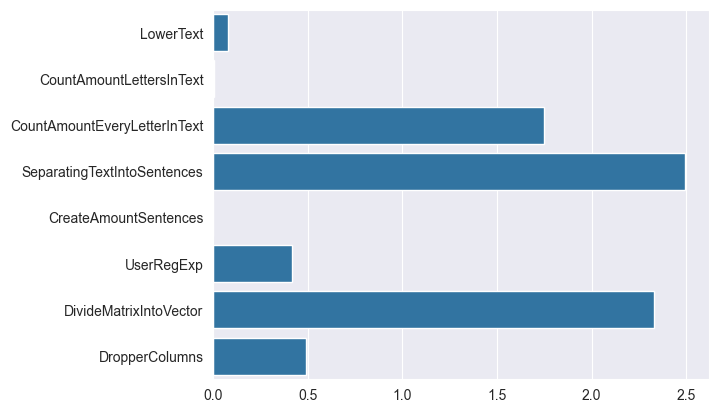

In [7]:
sns.barplot(y=e.spend_time_for_transform_dic.keys(), x=e.spend_time_for_transform_dic.values());

In [8]:
X

,text,source,corrected_text,з,🌴,🧐,🏡,©,„,禁,...,'r _6,'a _6,'t _6,'o _6,'b _6,"""s _6","""o _6",'s _6,'e _6,'s\n_6
0,"The face on Mars is just a natural landform, ...",cohere-command,"the face on mars is just a natural landform, ...",0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,"As a fellow citizen, I believe it is essenti...",NousResearch/Llama-2-7b-chat-hf,"as a fellow citizen, i believe it is essenti...",0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,Introduction: The Face on Mars has been a topi...,falcon_180b_v1,introduction: the face on mars has been a topi...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,Many people have found success despite failure...,chat_gpt_moth,many people have found success despite failure...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,There are many bad reasons why you shouldn't g...,persaude_corpus,there are many bad reasons why you shouldn't g...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,Self-reliance is a crucial trait that has been...,llama2_chat,self-reliance is a crucial trait that has been...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4996,America's great past time might now be just th...,persaude_corpus,america's great past time might now be just th...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4997,The first painting I found at the KIA was Aut...,human_essays_by_misha,the first painting i found at the kia was aut...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4998,Advantages of Limiting Car Usage\n\nLimiting c...,gpt_3_5_turbo,advantages of limiting car usage\n\nlimiting c...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [9]:
{'n_sentences', 'n_letters'}

{'n_letters', 'n_sentences'}

In [18]:
cor_vec = X.iloc[:, 3:].corrwith(y)

borders = (-0.2, 0.2)
needed_columns = cor_vec[(cor_vec<borders[0]) | (cor_vec>borders[1])].index
needed_columns

Index(['2', ',', 'w', '9', ')', '”', '1', 'c', 'h', '3', 'n', '\n', ' ', ';',
       'i', '(', '“', '’'],
      dtype='object')

In [19]:
X[needed_columns]

,2,",",w,9,),”,1,c,h,3,n,\n,,;,i,(,“,’
0,0.000000,0.006462,0.005924,0.000000,0.00000,0.000000,0.000000,0.042003,0.040926,0.000000,0.060851,0.003231,0.172859,0.000000,0.050619,0.00000,0.000000,0.000000
1,0.000000,0.014485,0.008277,0.000000,0.00000,0.000000,0.000000,0.037248,0.035696,0.000000,0.052768,0.004139,0.153647,0.000000,0.070874,0.00000,0.000000,0.000000
2,0.000617,0.006165,0.010481,0.000617,0.00000,0.000000,0.001233,0.025277,0.040691,0.000617,0.059803,0.004932,0.180641,0.000000,0.053021,0.00000,0.000000,0.000000
3,0.000000,0.011750,0.012987,0.000618,0.00000,0.000000,0.000618,0.029685,0.026592,0.000000,0.056895,0.002474,0.160792,0.000000,0.061843,0.00000,0.000000,0.002474
4,0.000000,0.000668,0.029372,0.000000,0.00000,0.000000,0.000668,0.012684,0.039386,0.000668,0.058077,0.006676,0.200935,0.000000,0.064753,0.00000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,0.000436,0.007407,0.007843,0.000000,0.00000,0.000000,0.000000,0.021786,0.037473,0.000000,0.064924,0.003486,0.165142,0.000000,0.065795,0.00000,0.000000,0.000000
4996,0.000878,0.004685,0.015227,0.000293,0.00000,0.000000,0.000293,0.028404,0.036018,0.000293,0.054758,0.001757,0.176867,0.000000,0.060029,0.00000,0.000000,0.000000
4997,0.000212,0.006999,0.011453,0.000000,0.00106,0.000212,0.001273,0.023754,0.038812,0.000000,0.068717,0.001273,0.167550,0.000212,0.069565,0.00106,0.000212,0.001060
4998,0.000293,0.012907,0.004693,0.000000,0.00000,0.000000,0.000293,0.041068,0.027281,0.000000,0.072455,0.003520,0.152244,0.000000,0.073335,0.00000,0.000000,0.000000


In [12]:
X.iloc[:, 3:].corrwith(y).sort_values()

h    -0.460576
     -0.347151
’    -0.327659
“    -0.289188
”    -0.288465
        ...   
i     0.241316
n     0.260617
,     0.265091
\n    0.283196
c     0.305034
Length: 6984, dtype: float64

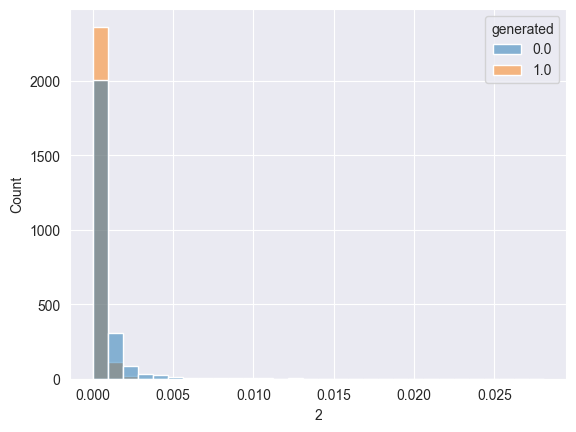

<Axes: xlabel='2', ylabel=' '>

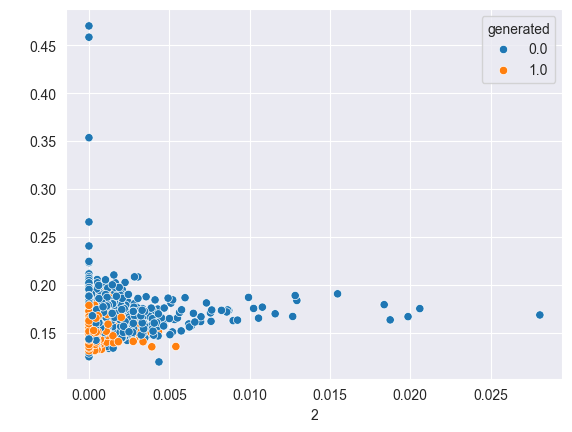

In [20]:
x_column = '2'
y_column = ' '

sns.histplot(data=X, x=x_column, hue=y, bins=30)
plt.show()
sns.scatterplot(data=X, x=x_column, y=y_column, hue=y)

In [14]:
|set.union(*l)

SyntaxError: invalid syntax (2752224562.py, line 1)

In [ ]:
re.findall("[a-zA-Z]+([a-z]{1,3})\W",  X['text'].iloc[0])